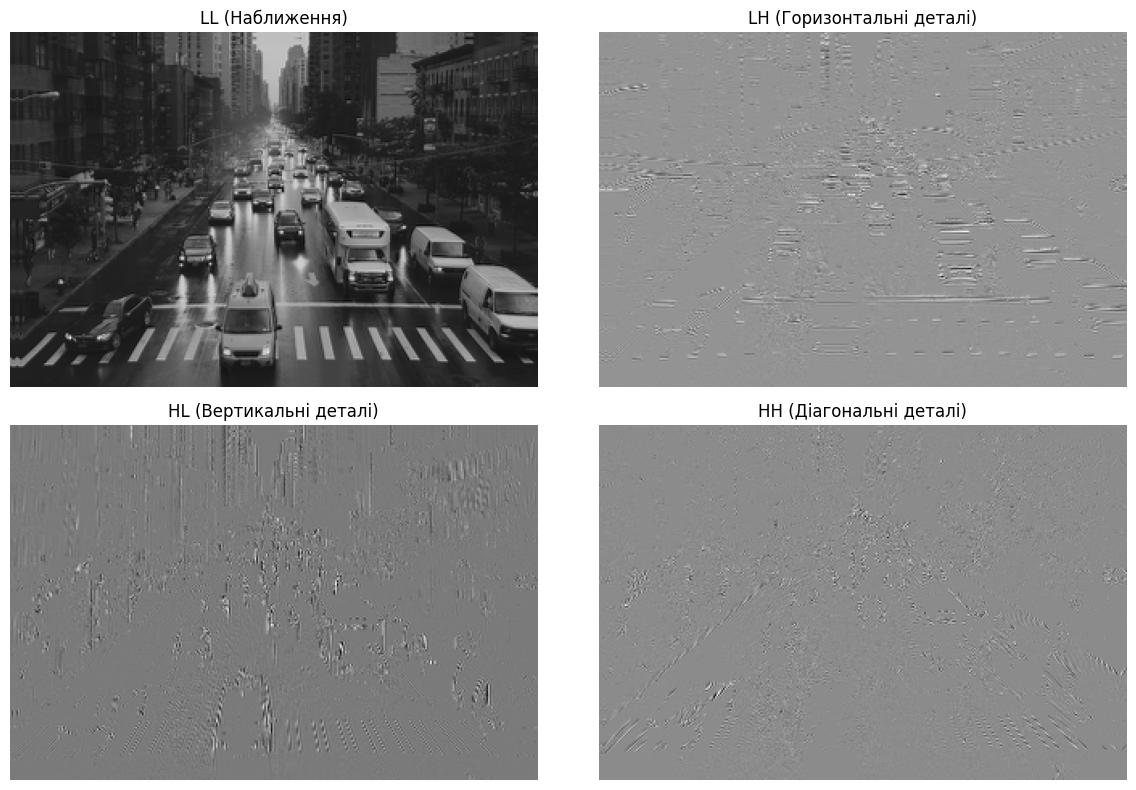

In [34]:
"""ПРИКЛАДИ З КУРСОВОЇ РОБОТИ, ЩО ЗАЗНАЧЕНІ В ТЕОРЕТИЧНІЙ ЧАСТИНІ"""

import cv2
import pywt
import matplotlib.pyplot as plt


img = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)

coeffs = pywt.wavedec2(img, 'db6', level=2)
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(cA2, cmap='gray')
plt.title('LL (Наближення)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cH2, cmap='gray')
plt.title('LH (Горизонтальні деталі)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cV2, cmap='gray')
plt.title('HL (Вертикальні деталі)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cD2, cmap='gray')
plt.title('HH (Діагональні деталі)')
plt.axis('off')
plt.tight_layout()
plt.show()

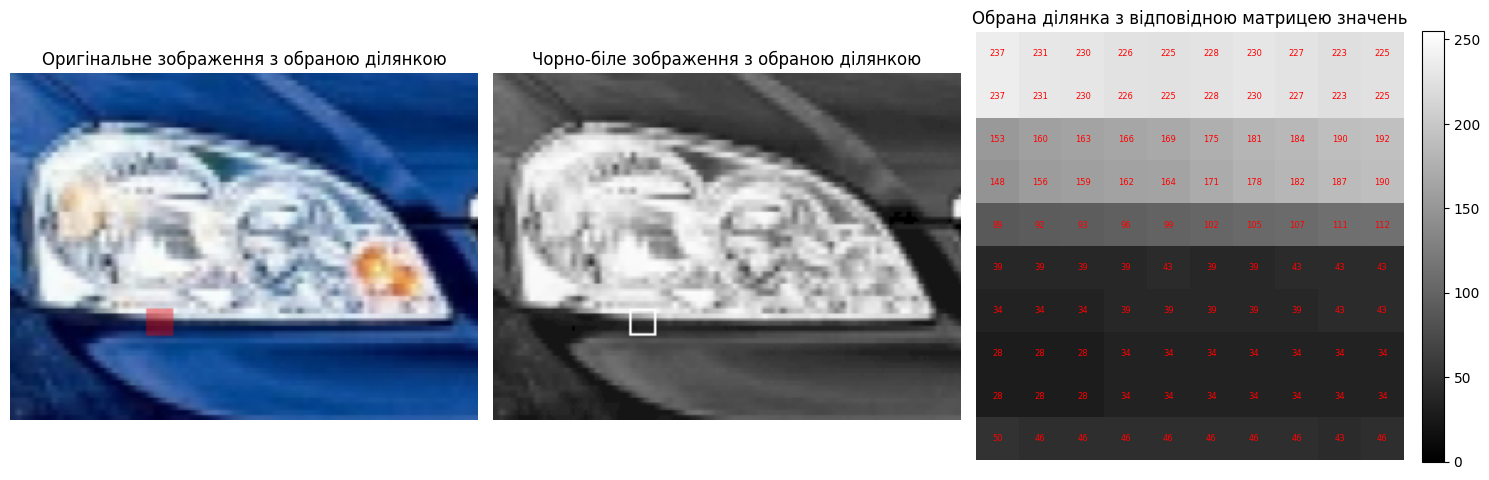

In [21]:
import matplotlib.pyplot as plt
import cv2


alpha = 0.4    #прозорість

orig_img = cv2.imread("image2.png")
gray_img = cv2.imread("image2.png", cv2.IMREAD_GRAYSCALE)

x, y, w, h = 55, 95, 10, 10    #координати прямокутника
roi = gray_img[y:y+h, x:x+w]

overlay = orig_img.copy()
cv2.rectangle(overlay, (x, y), (x+w, y+h), (0, 0, 255), thickness=-1)  # заповнений прямокутник
transparent_img = cv2.addWeighted(overlay, alpha, orig_img, 1 - alpha, 0)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(transparent_img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Оригінальне зображення з обраною ділянкою")
axs[0].axis('off')

gray_img_copy = gray_img.copy()
cv2.rectangle(gray_img_copy, (x, y), (x+w, y+h), 255, thickness=1) # біла рамка на сірому
transparent_img = cv2.addWeighted(overlay, alpha, orig_img, 1 - alpha, 0)
axs[1].imshow(gray_img_copy, cmap='gray')
axs[1].set_title("Чорно-біле зображення з обраною ділянкою")
axs[1].axis('off')

im = axs[2].imshow(roi, cmap='gray', vmin=0, vmax=255)
axs[2].set_title("Обрана ділянка з відповідною матрицею значень")
axs[2].axis('off')

for i in range(h):
    for j in range(w):
        val = roi[i, j]
        axs[2].text(j, i, str(val), ha='center', va='center', color='red', fontsize=6)

cbar = fig.colorbar(im, ax=axs[2], orientation='vertical', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

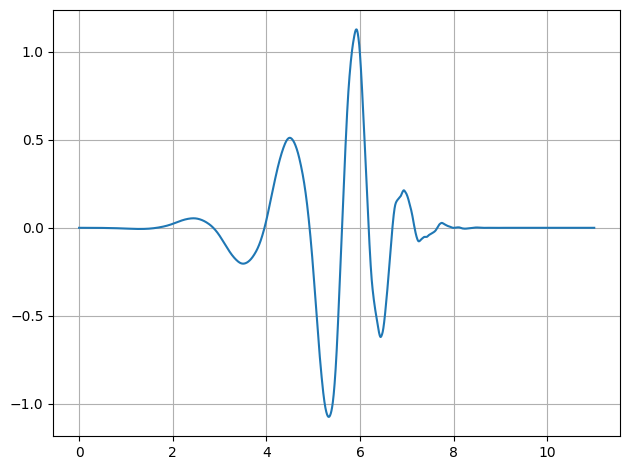

In [24]:
import pywt
import matplotlib.pyplot as plt

wavelet = pywt.Wavelet('db6')

_, psi, x = wavelet.wavefun(level=10)

plt.plot(x, psi)
plt.grid(True)
plt.tight_layout()
plt.show()

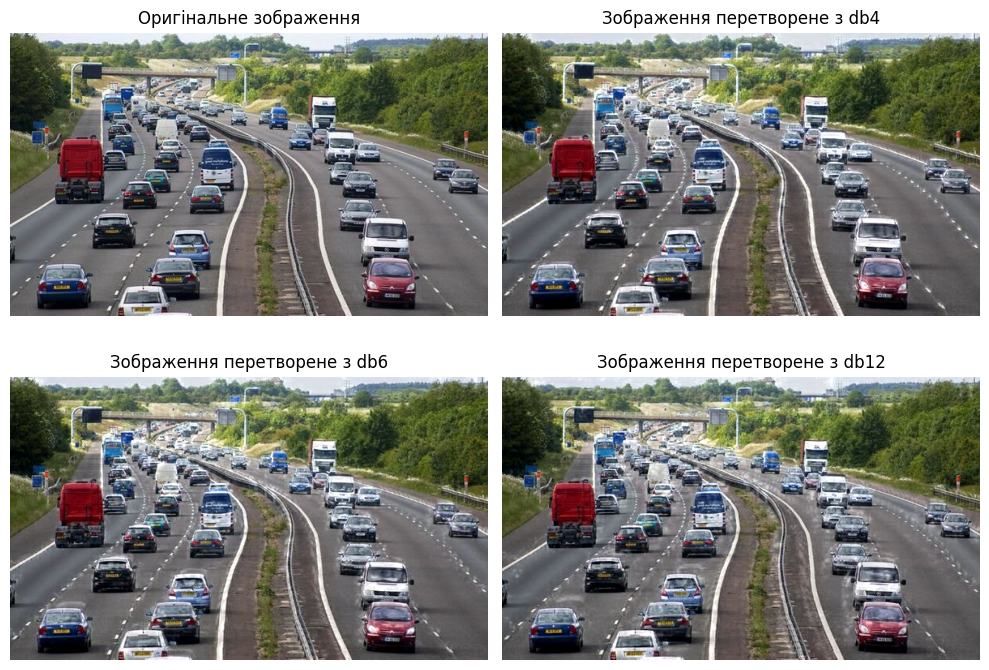

In [1]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

def preprocess_wavelet(img, wavelet, lambda_=1.0):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    coeffs2 = pywt.dwt2(gray, wavelet)
    _, (H, V, D) = coeffs2
    W = np.sqrt(H ** 2 + V ** 2 + D ** 2)
    W = cv2.resize(W, (img.shape[1], img.shape[0]))
    W_centered = W - np.mean(W)
    img_float = img.astype(np.float32)
    W3 = np.stack([W_centered] * 3, axis=-1)
    result = img_float + lambda_ * W3
    return np.clip(result, 0, 255).astype(np.uint8)

img = cv2.imread('image3.jpg')
if img is None:
    raise ValueError("Не вдалося завантажити зображення. Перевір шлях.")

wavelets = ['db3', 'db6', 'db12']
processed_imgs = [preprocess_wavelet(img, w) for w in wavelets]

titles = ['Оригінальне зображення', 'Зображення перетворене з db4', 'Зображення перетворене з db6', 'Зображення перетворене з db12']
images = [img] + processed_imgs

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=-0.45)
plt.show()